# Comparing filters from different NN models

TODO:

- method for comparing two motifs (tomtom?)
- intersection/unions of different filter sets
- avg distance between two motif sets (avg Euclidean distance? avg KL divergence?)
- compare filter parameters directly? distances, sets, etc.?

In [10]:
%matplotlib inline
from keras.models import model_from_json

import sys
import os
sys.path.append(os.path.abspath('../src/'))
import nn_utils
reload(nn_utils)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

import cPickle
import draw_logo
reload(draw_logo)


<module 'draw_logo' from '/home/yjzhang/Grad_School/research_notebooks/alternative_splicing_neural_nets/src/draw_logo.py'>

In [2]:
# step 1: load motifs from different neural networks
motif1 = np.load('../data/2017-01-12-filters.npy')
motif2 = np.load('../data/2017-01-13-filters.npy')
motif3 = np.load('../data/2017-02-01-filters.npy')
motif4 = np.load('../data/2017-02-02-left-filters.npy')

In [11]:
# step 2: calculate symmetric KL divergence between sets of filters
distances_1 = draw_logo.motif_set_comparison(motif1, motif2)

In [16]:
plt.imshow(distances_1)
plt.colorbar()

In [17]:
distances_2 = draw_logo.motif_set_comparison(motif1, motif3)

In [18]:
plt.imshow(distances_2)
plt.colorbar()

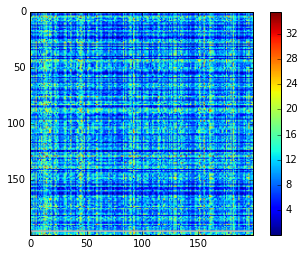

In [19]:
distances_3 = draw_logo.motif_set_comparison(motif1, motif4)
plt.imshow(distances_3)
plt.colorbar()

In [25]:
np.mean(distances_1[~np.isnan(distances_1)])

13.004473442975007

In [26]:
np.mean(distances_2[~np.isnan(distances_2)])

12.972506920440459

In [27]:
np.mean(distances_3[~np.isnan(distances_3)])

10.366287283228473

Okay, so here are some problems:

- How do we interpret the "distance" between motifs?
- We would expect the motifs learned from different network structures to be more different than the structures???

(array([  1.03100000e+03,   6.53900000e+03,   1.03570000e+04,
          8.35200000e+03,   4.43800000e+03,   1.61400000e+03,
          4.14000000e+02,   7.80000000e+01,   1.00000000e+01,
          2.00000000e+00]),
 array([  0.10019059,   4.43773903,   8.77528746,  13.1128359 ,
         17.45038433,  21.78793277,  26.1254812 ,  30.46302964,
         34.80057807,  39.13812651,  43.47567494]),
 <a list of 10 Patch objects>)

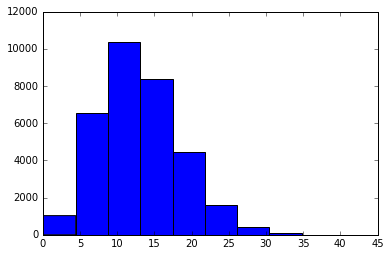

In [32]:
plt.hist(distances_1[~np.isnan(distances_1)].flatten())

(array([  1.11600000e+03,   7.22300000e+03,   1.15740000e+04,
          9.06200000e+03,   4.77900000e+03,   1.61000000e+03,
          3.62000000e+02,   7.50000000e+01,   1.70000000e+01,
          2.00000000e+00]),
 array([  0.15088584,   4.5018005 ,   8.85271515,  13.20362981,
         17.55454446,  21.90545911,  26.25637377,  30.60728842,
         34.95820308,  39.30911773,  43.66003239]),
 <a list of 10 Patch objects>)

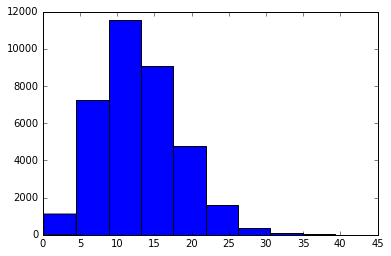

In [33]:
plt.hist(distances_2[~np.isnan(distances_2)].flatten())

In [39]:
plt.hist(distances_3[~np.isnan(distances_3)].flatten())
plt.xlim(0, 45)

(0, 45)